## 1. Business Problem Understanding

The goal of this project is to build a model that can identify spam SMS messages.

For this, we will use the SMS Spam Collection dataset, which contains 5,574 SMS messages in English, each labeled as either ham (legitimate) or spam. This dataset is widely used for SMS spam research.

SMS Spam Filtering refers to the process of automatically identifying and categorizing unwanted or unsolicited SMS messages (commonly known as spam) from legitimate ones. The objective is to reduce clutter in users' inboxes, enhance security by minimizing the risk of phishing and malware attacks, and improve the overall user experience.e.


In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

### 2. Data Prepraration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop last 3 cols:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)
df.sample(5)

,v1,v2
2835,ham,Nice.nice.how is it working?
3012,spam,FREE UNLIMITED HARDCORE PORN direct 2 your mob...
802,spam,FREE for 1st week! No1 Nokia tone 4 ur mobile ...
75,ham,I am waiting machan. Call me once you free.
604,ham,Meet after lunch la...


In [6]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace =True)
df.sample(3)

,target,text
2393,ham,"Okey doke. I'm at home, but not dressed cos la..."
5110,spam,You have 1 new message. Please call 08715205273
2647,ham,"It,,s a taxt massage....tie-pos argh ok! Lool!"


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])   #converting spam to 1 and ham to 0
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [8]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

### 3.Data Preprocessing

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

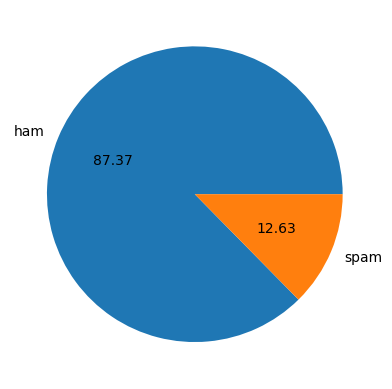

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')        # 0:ham, 1:spam
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters'] = df['text'].apply(len) 

In [17]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# for ham sms:
df[df['target'] ==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# For spam sms:
df[df['target'] ==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


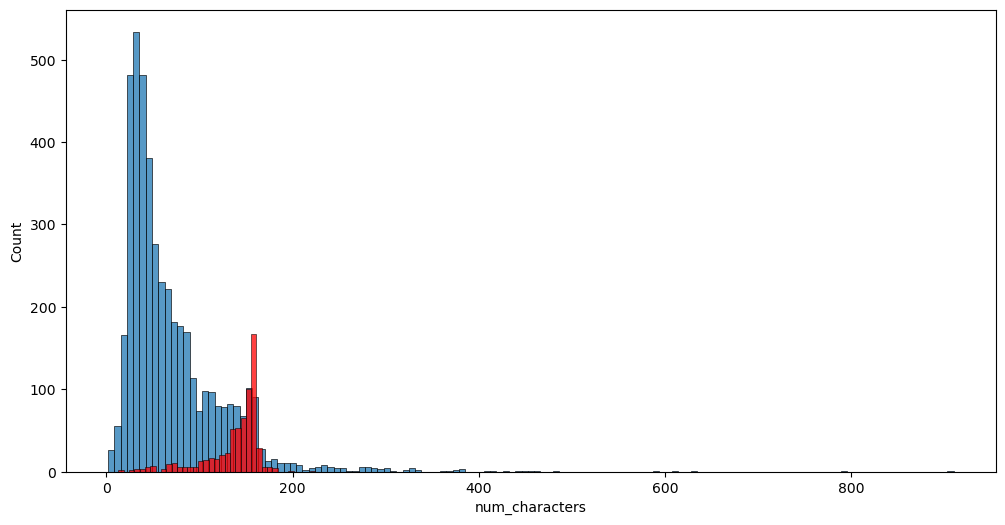

In [23]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

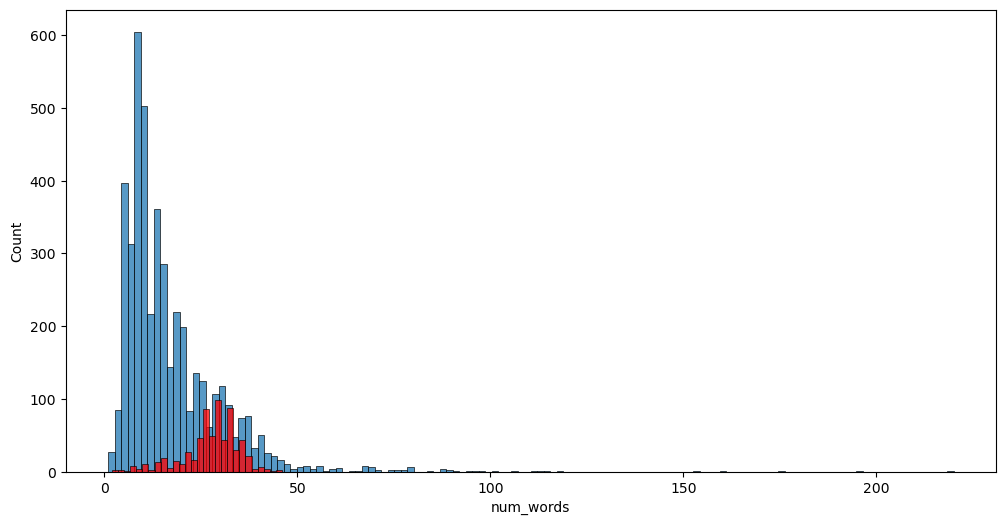

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

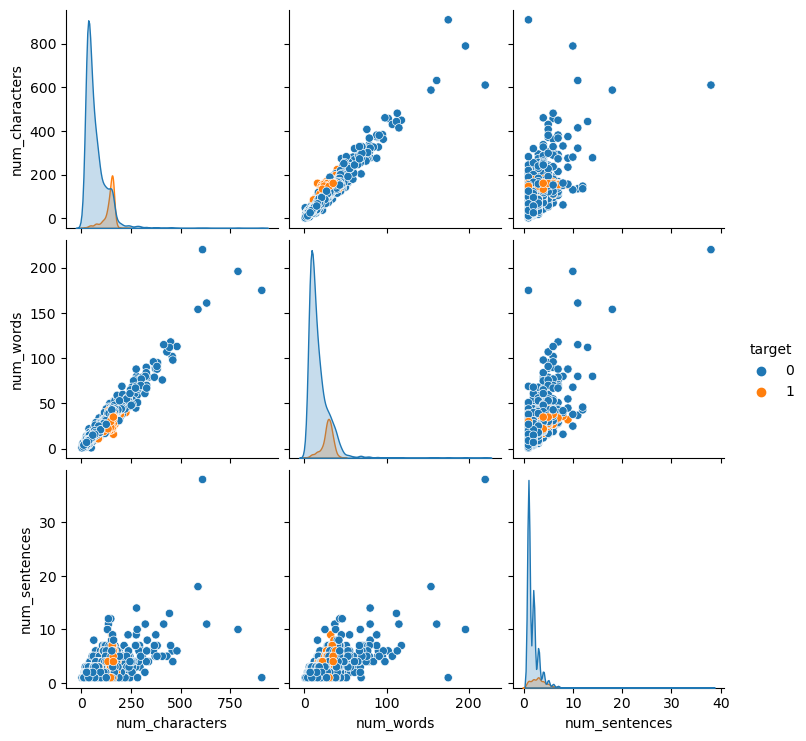

In [25]:
sns.pairplot(df,hue='target')

In [26]:
def transform_text(text):
    text.lower()
    text = nltk.word_tokenize(text)
    return text

    y = []
    for i in text:
        if i.isalnum():                  # alnum for removing special characters
            y.append(i)
        return y 

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.puntuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return ''.join(y)

In [27]:
df['transformed_text']= df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [28]:
# Generating wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size=10,background_color = 'white')

In [29]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=' '))

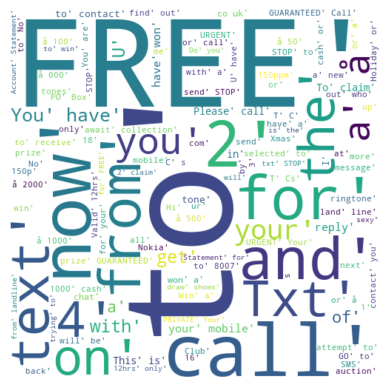

In [30]:
#plt.figure(figsize=(12, 6))  # adjust figure size if needed
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

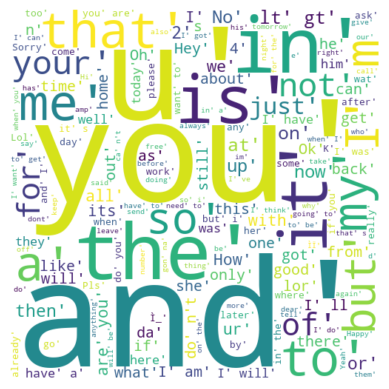

In [31]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep=' '))

plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [32]:
# Top 30 words of spam/ham mail:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].astype(str).tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [33]:
spam_corpus

["['Free',",
 "'entry',",
 "'in',",
 "'2',",
 "'a',",
 "'wkly',",
 "'comp',",
 "'to',",
 "'win',",
 "'FA',",
 "'Cup',",
 "'final',",
 "'tkts',",
 "'21st',",
 "'May',",
 "'2005',",
 "'.',",
 "'Text',",
 "'FA',",
 "'to',",
 "'87121',",
 "'to',",
 "'receive',",
 "'entry',",
 "'question',",
 "'(',",
 "'std',",
 "'txt',",
 "'rate',",
 "')',",
 "'T',",
 "'&',",
 "'C',",
 '"\'s",',
 "'apply',",
 "'08452810075over18',",
 '"\'s"]',
 "['FreeMsg',",
 "'Hey',",
 "'there',",
 "'darling',",
 "'it',",
 '"\'s",',
 "'been',",
 "'3',",
 "'week',",
 '"\'s",',
 "'now',",
 "'and',",
 "'no',",
 "'word',",
 "'back',",
 "'!',",
 "'I',",
 '"\'d",',
 "'like',",
 "'some',",
 "'fun',",
 "'you',",
 "'up',",
 "'for',",
 "'it',",
 "'still',",
 "'?',",
 "'Tb',",
 "'ok',",
 "'!',",
 "'XxX',",
 "'std',",
 "'chgs',",
 "'to',",
 "'send',",
 "',',",
 "'å£1.50',",
 "'to',",
 "'rcv']",
 "['WINNER',",
 "'!',",
 "'!',",
 "'As',",
 "'a',",
 "'valued',",
 "'network',",
 "'customer',",
 "'you',",
 "'have',",
 "'been',",
 "'selec

In [34]:
len(spam_corpus)

18067

In [35]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[("'.',", 790),
 ("'to',", 525),
 ("'!',", 413),
 ("'a',", 314),
 ("',',", 301),
 ("'you',", 170),
 ("'your',", 170),
 ("'call',", 161),
 ("'the',", 159),
 ("'&',", 158),
 ("'2',", 156),
 ("'or',", 155),
 ("'for',", 153),
 ("'?',", 152),
 ("':',", 150),
 ("'is',", 136),
 ("'now',", 116),
 ("'on',", 114),
 ("'Call',", 112),
 ("'have',", 111),
 ("'from',", 108),
 ("'*',", 105),
 ("'and',", 102),
 ("'4',", 99),
 ("'with',", 87),
 ("'ur',", 86),
 ("'FREE',", 83),
 ("'mobile',", 81),
 ("'of',", 79),
 ("'.']", 69)]

In [36]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
# Top 30 words of spam/ham mail:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].astype(str).tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

### 4. Model Building & Evaluation

In [ ]:
# Converting data into bag-of-words(bow)
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer() 
tfidf = TfidfVectorizer()

In [ ]:
# If 'transformed_text' contains tokenized lists, join them back into strings
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Now you can use CountVectorizer
X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X

In [ ]:
X.shape

In [ ]:
y = df['target'].values
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb =  GaussianNB()
mnb =  MultinomialNB()
bnb =  BernoulliNB()


In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))      

- bnb and mnb performs better as precision score is preferred over accuracy for text classification,also false negative and false positive are less here

In [ ]:
# Now applying other Ml algorrithms to check the precision and accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel = 'sigmoid',gamma=1.0)
knn = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state =2)
abc = AdaBoostClassifier(n_estimators = 50,random_state =2)
bc = BaggingClassifier(n_estimators = 50,random_state =2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state =2)
gb = GradientBoostingClassifier(n_estimators = 50,random_state =2)
xgb = XGBClassifier(n_estimators = 50,random_state =2)


In [ ]:
clfs = {
    'SVC': svc,
    'KNN': knn,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'Adaboost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GradientB': gb,
    'XGboost' : xgb
}

In [38]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_score = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print('For',name)
    print('Accuracy',current_accuracy)
    print('Precision',current_precision)

    accuracy_score.append(current_accuracy)
    precision_score.append(current_precision)   

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accurancy':accuracy_score,'Precision':precision_score})